In [1]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('2023 dataset.csv')

In [4]:
df

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand
0,2023-01-01 00:00:00,6,0,1,28.534249,0,9.863744,551.973464
1,2023-01-01 01:00:00,6,1,1,18.140664,0,1.855833,569.099202
2,2023-01-01 02:00:00,6,2,1,19.539847,0,8.508665,663.336036
3,2023-01-01 03:00:00,6,3,1,17.519129,0,4.608703,516.206431
4,2023-01-01 04:00:00,6,4,1,18.255590,0,0.689777,554.241265
...,...,...,...,...,...,...,...,...
8732,2023-12-30 20:00:00,5,20,1,15.543201,0,4.312377,661.678150
8733,2023-12-30 21:00:00,5,21,1,12.110066,0,6.267570,610.682652
8734,2023-12-30 22:00:00,5,22,1,16.151403,0,9.458964,695.444712
8735,2023-12-30 23:00:00,5,23,1,4.870015,0,2.057425,565.423968


In [5]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [6]:
df['month'] = df['timestamp'].dt.month

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5, 6]:
        return 'Summer'
    else:
        return 'Monsoon'

df['season'] = df['month'].apply(get_season)

print(df[['timestamp', 'month', 'season']].head(10))


            timestamp  month  season
0 2023-01-01 00:00:00      1  Winter
1 2023-01-01 01:00:00      1  Winter
2 2023-01-01 02:00:00      1  Winter
3 2023-01-01 03:00:00      1  Winter
4 2023-01-01 04:00:00      1  Winter
5 2023-01-01 05:00:00      1  Winter
6 2023-01-01 06:00:00      1  Winter
7 2023-01-01 07:00:00      1  Winter
8 2023-01-01 08:00:00      1  Winter
9 2023-01-01 09:00:00      1  Winter


In [ ]:
def assign_daily_compensation_method(row):
    if row['is_holiday'] == 1:
        return 'Lower Power Supply'
    elif row['solar_generation'] > 2000:
        return 'Increased Renewable Energy Integration'
    elif row['temperature'] > 35:
        return 'Increased Power Supply'
    else:
        return 'Normal Operation'


df['compensation_method'] = df.apply(assign_daily_compensation_method, axis=1)

print(df[['timestamp', 'electricity_demand', 'compensation_method']].head(10))


            timestamp  electricity_demand compensation_method
0 2023-01-01 00:00:00          551.973464    Normal Operation
1 2023-01-01 01:00:00          569.099202    Normal Operation
2 2023-01-01 02:00:00          663.336036    Normal Operation
3 2023-01-01 03:00:00          516.206431    Normal Operation
4 2023-01-01 04:00:00          554.241265    Normal Operation
5 2023-01-01 05:00:00          514.438950    Normal Operation
6 2023-01-01 06:00:00          503.553116    Normal Operation
7 2023-01-01 07:00:00          465.062170    Normal Operation
8 2023-01-01 08:00:00          413.034254    Normal Operation
9 2023-01-01 09:00:00          356.513813    Normal Operation


In [ ]:
def assign_daily_compensation_method(row):
    if row['is_holiday'] == 1:
        return 'Lower Power Supply'
    elif row['solar_generation'] > 3000:
        return 'High Renewable Energy Integration'
    elif row['solar_generation'] > 2000:
        return 'Moderate Renewable Energy Integration'
    elif row['temperature'] > 40:
        return 'Critical Increased Power Supply'
    elif row['temperature'] > 35:
        return 'Increased Power Supply'
    elif row['is_weekend'] == 1 and row['temperature'] <= 25:
        return 'Reduced Load Compensation'
    elif row['temperature'] < 10:
        return 'Heating Demand Management'
    elif row['season'] == 'Winter' and row['temperature'] <= 15:
        return 'Increased Heating Load'
    elif row['season'] == 'Summer' and row['temperature'] >= 30:
        return 'Cooling Demand Management'
    else:
        return 'Normal Operation'


df['compensation_method'] = df.apply(assign_daily_compensation_method, axis=1)

print(df[['timestamp', 'electricity_demand', 'compensation_method']].head(10))


            timestamp  electricity_demand        compensation_method
0 2023-01-01 00:00:00          551.973464           Normal Operation
1 2023-01-01 01:00:00          569.099202  Reduced Load Compensation
2 2023-01-01 02:00:00          663.336036  Reduced Load Compensation
3 2023-01-01 03:00:00          516.206431  Reduced Load Compensation
4 2023-01-01 04:00:00          554.241265  Reduced Load Compensation
5 2023-01-01 05:00:00          514.438950  Reduced Load Compensation
6 2023-01-01 06:00:00          503.553116  Reduced Load Compensation
7 2023-01-01 07:00:00          465.062170  Reduced Load Compensation
8 2023-01-01 08:00:00          413.034254  Reduced Load Compensation
9 2023-01-01 09:00:00          356.513813  Reduced Load Compensation


<Axes: xlabel='compensation_method', ylabel='count'>

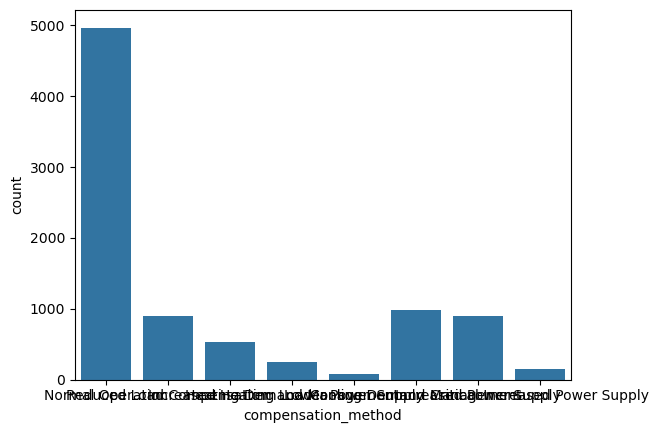

In [13]:
sns.countplot(x=df['compensation_method'])

In [14]:
df['year'] = df['timestamp'].dt.year

In [15]:
X = df[['temperature', 'solar_generation', 'is_holiday', 'year', 'month', 'is_weekend']]
y = df['electricity_demand']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [19]:
testset=pd.read_csv("2025 testset.csv")

In [20]:
testset

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand
0,2025-01-01 00:00:00,2,0,0,28.534249,0,9.863744,551.973464
1,2025-01-01 01:00:00,2,1,0,18.140664,0,1.855833,569.099202
2,2025-01-01 02:00:00,2,2,0,19.539847,0,8.508665,663.336036
3,2025-01-01 03:00:00,2,3,0,17.519129,0,4.608703,516.206431
4,2025-01-01 04:00:00,2,4,0,18.255590,0,0.689777,554.241265
...,...,...,...,...,...,...,...,...
8732,2025-12-30 20:00:00,1,20,0,15.543201,0,4.312377,661.678150
8733,2025-12-30 21:00:00,1,21,0,12.110066,0,6.267570,610.682652
8734,2025-12-30 22:00:00,1,22,0,16.151403,0,9.458964,695.444712
8735,2025-12-30 23:00:00,1,23,0,4.870015,0,2.057425,565.423968


In [26]:
testset['timestamp']=pd.to_datetime(testset['timestamp'])

In [27]:
testset['year'] = testset['timestamp'].dt.year
testset['month'] = testset['timestamp'].dt.month
X_test_p = testset[['temperature', 'solar_generation', 'is_holiday', 'year', 'month', 'is_weekend']]
y_test_p = testset['electricity_demand']

In [28]:
test_pred=model.predict(X_test_p)

In [29]:
df_year_prediction=pd.DataFrame(test_pred)

In [30]:
df_year_prediction['peak_supply_needed']=df_year_prediction[0]

In [31]:
df_year_prediction.drop(0, axis=1, inplace=True)

In [32]:
df_year_prediction['hour_of_day']=testset['hour_of_day']

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

In [ ]:
mae = mean_absolute_error(y_test_p, test_pred)
mse = mean_squared_error(y_test_p, test_pred)
r2 = r2_score(y_test_p, test_pred)
mape = np.mean(np.abs((y_test_p - test_pred) / y_test_p)) * 100

print("Evaluation Metrics on Test Set:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean R² Score: {r2}")
print(f"MAPE:{mape}")

Evaluation Metrics on Test Set:
Mean Absolute Error: 48.61093797005661
Mean Squared Error: 3721.6380410012735
Mean R² Score: 0.5355300553826341
MAPE:9.468251989698468


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8008\151193887.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=testset.head(100), x='hour_of_day', y='electricity_demand', palette='Set1')


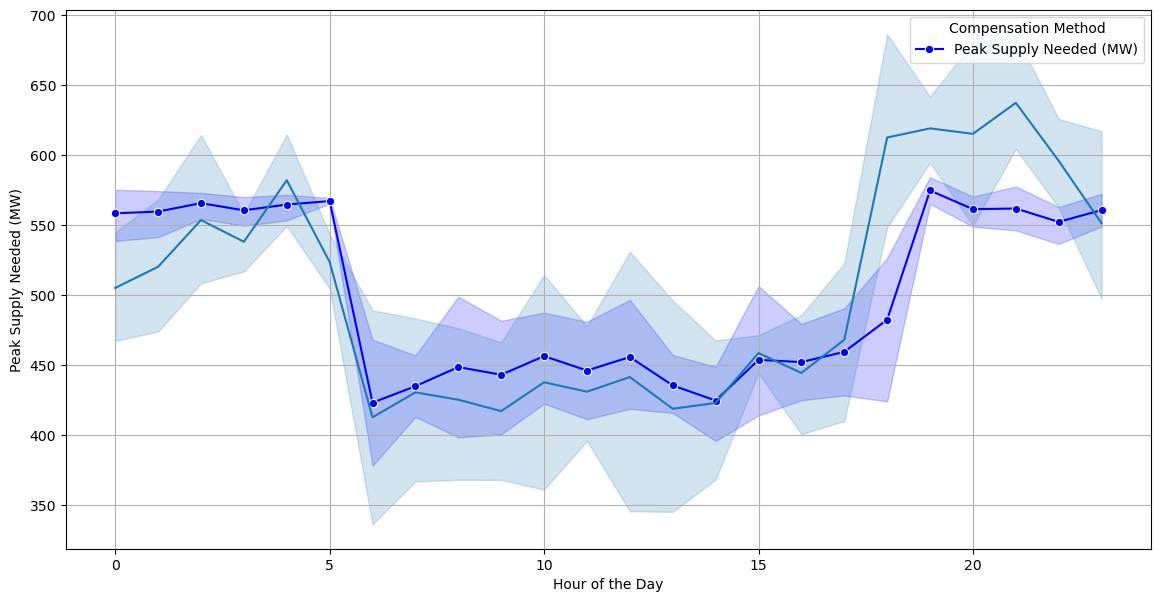

In [40]:
def plot_predictions(df_predictions):
    plt.figure(figsize=(14, 7))

    sns.lineplot(data=df_year_prediction.head(100), x='hour_of_day', y='peak_supply_needed', marker='o', color='blue', label='Peak Supply Needed (MW)')
    
    sns.lineplot(data=testset.head(100), x='hour_of_day', y='electricity_demand', palette='Set1')

    plt.xlabel('Hour of the Day')
    plt.ylabel('Peak Supply Needed (MW)')
    plt.legend(title='Compensation Method')
    plt.grid(True)
    plt.show()

plot_predictions(df_year_prediction)

In [41]:
model.save_model("xgb_regressor.json")